In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl


In [5]:
consumerKey = '6FRjLXtphki6NPvl9KUm059Ic'
consumerSecret = 'hgDUKn13hIOp5Z9992X7FxF6945UaD80HYPcfgVGeifdrdv6Dn'
accessToken = '489435544-Uq6H604sLJcdB2Sme4o6GdLmw3XvhhjfVA0FURFz'
accessTokenSecret = 'M6LGZ0e4n2o0HKhnJOhBqRSpkaR2GvThCbNdRTAvKtHKg'

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="iamsrk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) “Today a reader, tomorrow a leader.” – Margaret Fuller.  Well done and may you multiply the breed of young readers https://t.co/rK03FYkyoj

2) Diego Maradona....you made football even more beautiful. You will be sorely missed and may you entertain and enthral heaven as you did this world. RIP.... https://t.co/PlR2Laxfj2

3) Happy Diwali to one and all... may the beauty of this festival fill every heart with happiness and love. May all your troubles be overcome and let's pray that this Diwali sets the tone for a brighter, happier life ahead. https://t.co/BVctGRuOmR

4) @BrettLee_58 a very happy birthday to you my friend. Hope to see you soon and hear some new hindi songs on the guitar. Keep being the rockstar that you are.

5) It’s nice to see myself on the biggest and tallest screen in the world. My friend @mohamed_alabbar has me on the biggest screen even before my next film. Thanks &amp; love u all @BurjKhalifa &amp; @EmaarDubai. Being my own guest in Du

In [8]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"“Today a reader, tomorrow a leader.” – Margare..."
1,Diego Maradona....you made football even more ...
2,Happy Diwali to one and all... may the beauty ...
3,@BrettLee_58 a very happy birthday to you my f...
4,It’s nice to see myself on the biggest and tal...


In [9]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"“Today a reader, tomorrow a leader.” – Margare..."
1,Diego Maradona....you made football even more ...
2,Happy Diwali to one and all... may the beauty ...
3,_58 a very happy birthday to you my friend. Ho...
4,It’s nice to see myself on the biggest and tal...
5,Thank you all... hope to see you soon again. S...
6,DFC2020 TakeTheChallenge
7,Pyaar aise hota hai…saying the lines once agai...
8,Now time to go and be with the little one. Tha...
9,Papa


In [10]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"“Today a reader, tomorrow a leader.” – Margare...",0.200000,0.050000
1,Diego Maradona....you made football even more ...,0.750000,0.675000
2,Happy Diwali to one and all... may the beauty ...,0.600000,0.666667
3,_58 a very happy birthday to you my friend. Ho...,0.727273,0.568182
4,It’s nice to see myself on the biggest and tal...,0.706250,0.506250
5,Thank you all... hope to see you soon again. S...,0.550000,0.562500
6,DFC2020 TakeTheChallenge,0.000000,0.000000
7,Pyaar aise hota hai…saying the lines once agai...,0.452778,0.038889
8,Now time to go and be with the little one. Tha...,0.650000,0.078125
9,Papa,0.000000,0.000000


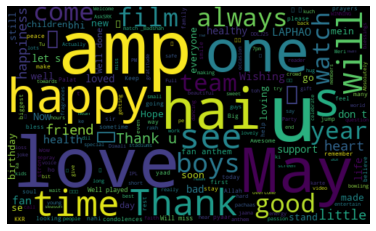

In [11]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [12]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"“Today a reader, tomorrow a leader.” – Margare...",0.200000,0.050000,Positive
1,Diego Maradona....you made football even more ...,0.750000,0.675000,Positive
2,Happy Diwali to one and all... may the beauty ...,0.600000,0.666667,Positive
3,_58 a very happy birthday to you my friend. Ho...,0.727273,0.568182,Positive
4,It’s nice to see myself on the biggest and tal...,0.706250,0.506250,Positive
5,Thank you all... hope to see you soon again. S...,0.550000,0.562500,Positive
6,DFC2020 TakeTheChallenge,0.000000,0.000000,Neutral
7,Pyaar aise hota hai…saying the lines once agai...,0.452778,0.038889,Positive
8,Now time to go and be with the little one. Tha...,0.650000,0.078125,Positive
9,Papa,0.000000,0.000000,Neutral


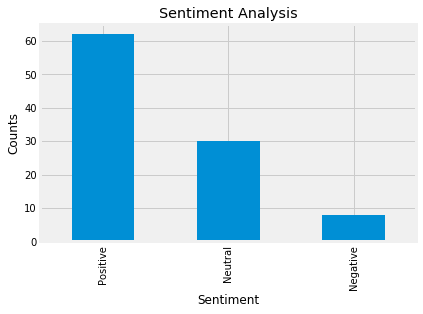

In [13]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()